<a href="https://colab.research.google.com/github/IvanIndargo/Datamining_exersice/blob/main/IvanIndargo_Supermarket_December_2017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Strategy to Boost Supermarket Sales in January

As the manager of a supermarket in Surabaya, I find myself at a crossroads as we step into January. The new year has just begun, and I am eager to understand how my supermarket has been performing. My office is filled with stacks of transaction data from our customers, brimming with numbers, percentages, and seemingly endless combinations of products. Yet, I feel lost amidst the overwhelming data.

The challenge is clear: I need **insights on what is truly happening in my supermarket**. What are the purchasing patterns of my customers? Which products are flying off the shelves, and which ones are barely noticed? More importantly, **how can I use this information to optimize the layout of the store and boost sales this year**?

In January, **the store layout is the first thing I want to focus on**. Customers are navigating through the aisles, but I want to ensure they’re being guided to the right places. I wonder: Should I place complementary products closer together? Should I create specific zones to attract customers? For instance, should shampoos be next to toothpaste or near body soaps? Should snacks and drinks be closer together to encourage impulse buys?

The only thing I have right now is the [raw transaction data](https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/Supermarket-December-2017.xlsx). It tells me what customers bought, but I need help deciphering it. **Are there certain product combinations that people frequently buy together?** For example, do people who buy detergents also pick up fabric softeners? Do snacks and beverages have a strong pairing trend?

I need your expertise to dig into this data and uncover patterns. Once we understand what products customers often buy together, I can rearrange the store layout to make it more intuitive and appealing. This way, I can improve the shopping experience for my customers while also increasing the chances of cross-selling and boosting sales.

Let’s uncover the story behind the numbers and make data-driven decisions that will set my supermarket up for success in this new year. Help me turn this chaotic dataset into a clear strategy that drives results!

### Grading

1. Understanding the Data (50 points)


*   Key Metrics (0/10/15/25 points): Identifies useful insights, eg: top-selling products, etc.
*   Seasonal Insights (0/10/15/25 points): Explains trends for January, highlighting any seasonal demands or anomalies in customer behavior.
<br>
<br>

2. Recommending Layout Improvements (50 points)

*   Market Basket Analysis Insights (0/10/15/25 points): Uses association rules to determine logical groupings of products.
*   Placement Ideas (0/10/15/25 points): Provides actionable layout changes idea to increase cross-selling opportunities, such as adjusting the location of high-demand complementary items, eg:
If "Shampoo" is frequently bought with "Soap," they should be placed near each other.




In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.dates as mdates

!pip install mlxtend==0.23.1

In [2]:
# URL raw file Excel
url = 'https://raw.githubusercontent.com/IvanIndargo/dataset-DM/main/Supermarket-December-2017.xlsx'

# Load Excel file
df = pd.read_excel(url)

# Menampilkan 5 data teratas dari dataset
print(df.head())


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  KD_SBR TP_TRN  KDSUP  KAS TRN_DK GDG   GGD  KDSLS      KEL     ITEM  ...  \
0     IN    JUL    NaN  6.0      K   A  AREA    NaN   KERTAS  39390.0  ...   
1     IN    JUL    NaN  6.0      K   A  AREA    NaN  BTL/DOT  13108.0  ...   
2     IN    JUL    NaN  6.0      K   A  AREA    NaN  MUSTIKA   5644.0  ...   
3     IN    JUL    NaN  6.0      K   A  AREA    NaN  SABUN.C   7273.0  ...   
4     IN    JUL    NaN  6.0      K   A  AREA    NaN  LULURMD  12168.0  ...   

  DEP_SWA  GON  KONS POST_STOK STATUS  TP_ADJ USER    TANGGAL       JAM  \
0     NaN  NaN   NaN       NaN    NaN       S  MIA 2017-01-02  08:12:02   
1     NaN  NaN   NaN       NaN    NaN       S  MIA 2017-01-02  08:24:51   
2     NaN  NaN   NaN       NaN    NaN       S  MIA 2017-01-02  08:28:18   
3     NaN  NaN   NaN       NaN    NaN       S  MIA 2017-01-02  08:28:22   
4     NaN  NaN   NaN       NaN    NaN       S  MIA 2017-01-02  08:28:20   

   LAMA_CRD  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       Na

In [3]:
df.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148489 entries, 0 to 148488
Data columns (total 61 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   KD_SBR      148486 non-null  object        
 1   TP_TRN      148486 non-null  object        
 2   KDSUP       40832 non-null   float64       
 3   KAS         136294 non-null  float64       
 4   TRN_DK      148486 non-null  object        
 5   GDG         148486 non-null  object        
 6   GGD         148486 non-null  object        
 7   KDSLS       0 non-null       float64       
 8   KEL         148486 non-null  object        
 9   ITEM        148486 non-null  float64       
 10  NAMA        148486 non-null  object        
 11  BIN         13586 non-null   float64       
 12  KDBIN       0 non-null       float64       
 13  TGL_TRANS   148486 non-null  datetime64[ns]
 14  NO_BKT      148486 non-null  object        
 15  NO_ORD      0 non-null       float64       
 16  ST

In [4]:
# List of columns to drop
columns_to_drop = [
    'KD_SBR', 'TP_TRN', 'KDSUP', 'KAS', 'TRN_DK', 'GDG', 'GGD', 'KDSLS',
    'BIN', 'KDBIN', 'NO_ORD', 'STS_BYR', 'SLD_AK', 'SLD_AKG',
    'HRG_OLD', 'HRGBL_OLD', 'HRG_PKK', 'HRG_JUL', 'DISC', 'DISC1', 'DISC2',
    'JLH_DIS', 'JLH_DIS1', 'JLH_DIS2', 'HRGJL_OLD', 'HRGJL1_OLD', 'HRGJL2_OLD',
    'SUPP_OLD', 'DISB1_OLD', 'DISB2_OLD', 'PPN', 'PPN_OLD', 'PPNBM', 'PPNBM_OLD',
    'KET_TRANS', 'PTS_GDG', 'PTS_KEL', 'PTS_ITEM', 'QTY_PTS', 'TRNBL', 'POST',
    'TGL_OLD', 'FILLER', 'SUPPLIER', 'DEP_SWA', 'GON', 'KONS', 'POST_STOK',
    'STATUS', 'TP_ADJ', 'USER', 'LAMA_CRD'
]
# Drop the columns
df = df.drop(columns=columns_to_drop)

# Check the remaining columns
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148489 entries, 0 to 148488
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   KEL        148486 non-null  object        
 1   ITEM       148486 non-null  float64       
 2   NAMA       148486 non-null  object        
 3   TGL_TRANS  148486 non-null  datetime64[ns]
 4   NO_BKT     148486 non-null  object        
 5   QTY        148486 non-null  float64       
 6   JLH_TRANS  148486 non-null  float64       
 7   TANGGAL    148486 non-null  datetime64[ns]
 8   JAM        148486 non-null  object        
dtypes: datetime64[ns](2), float64(3), object(4)
memory usage: 10.2+ MB
None


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
df.dropna()
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
KEL,3
ITEM,3
NAMA,3
TGL_TRANS,3
NO_BKT,3
QTY,3
JLH_TRANS,3
TANGGAL,3
JAM,3


In [6]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
df= pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
KEL,0
ITEM,0
NAMA,0
TGL_TRANS,0
NO_BKT,0
QTY,0
JLH_TRANS,0
TANGGAL,0
JAM,0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


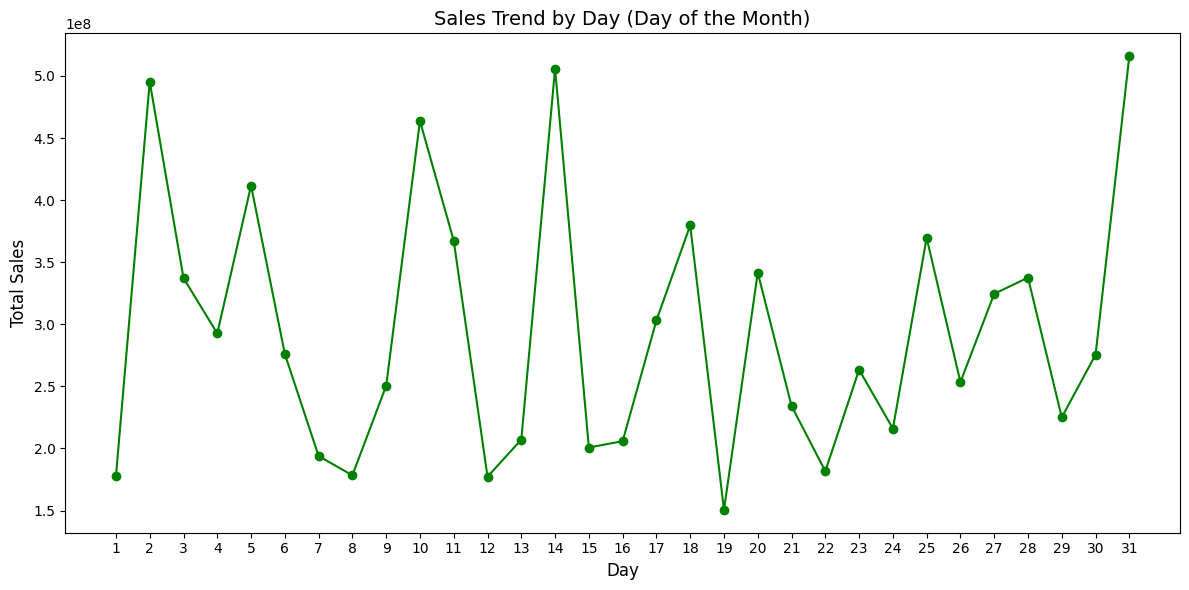

In [8]:
df['TGL_TRANS'] = pd.to_datetime(df['TGL_TRANS'])
df['Day'] = df['TGL_TRANS'].dt.day
daily_sales = df.groupby('Day')['JLH_TRANS'].sum().reset_index()
# Create a line chart
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Day'], daily_sales['JLH_TRANS'], marker='o', color='green', linestyle='-')
plt.title('Sales Trend by Day (Day of the Month)', fontsize=14)
plt.xlabel('Day', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(range(1, 32))
plt.tight_layout()
plt.show()

In [9]:
df['TGL_TRANS'] = pd.to_datetime(df['TGL_TRANS'])
df['day'] = df['TGL_TRANS'].dt.day
df['month'] = df['TGL_TRANS'].dt.month
df['year'] = df['TGL_TRANS'].dt.year
df['day_name'] = df['TGL_TRANS'].dt.day_name()
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,KEL,ITEM,NAMA,TGL_TRANS,NO_BKT,QTY,JLH_TRANS,TANGGAL,JAM,Day,day,month,year,day_name
0,KERTAS,39390.0,KERTAS KADO SINAR DU,2017-01-02,060102001,2.0,2200.0,2017-01-02,08:12:02,2,2,1,2017,Monday
1,BTL/DOT,13108.0,PIGEON BTL PP RP 240,2017-01-02,060102002,1.0,23000.0,2017-01-02,08:24:51,2,2,1,2017,Monday
2,MUSTIKA,5644.0,MR SEKAR TANJUNG KB,2017-01-02,060102003,1.0,9500.0,2017-01-02,08:28:18,2,2,1,2017,Monday
3,SABUN.C,7273.0,BIORE BF 100ML WHITE,2017-01-02,060102003,1.0,6900.0,2017-01-02,08:28:22,2,2,1,2017,Monday
4,LULURMD,12168.0,OVALE LULUR BALI BEN,2017-01-02,060102003,1.0,13500.0,2017-01-02,08:28:20,2,2,1,2017,Monday


In [10]:
df['JAM'] = pd.to_datetime(df['JAM'], format='%H:%M:%S', errors='coerce')

# Extract the hour from the 'JAM' column
df['hour'] = df['JAM'].dt.hour

# Display the first few rows to verify
print(df[['JAM', 'hour']].head())

                  JAM  hour
0 1900-01-01 08:12:02     8
1 1900-01-01 08:24:51     8
2 1900-01-01 08:28:18     8
3 1900-01-01 08:28:22     8
4 1900-01-01 08:28:20     8


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
transaction_agg = df.pivot_table(index='month', columns='day_name', values='NO_BKT', aggfunc='count', fill_value=0)
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
transaction_agg = transaction_agg[days_order]
transaction_agg

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


day_name,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
month,,,,,,,
1,24061,26911,19493,15633,18469,16902,27020


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


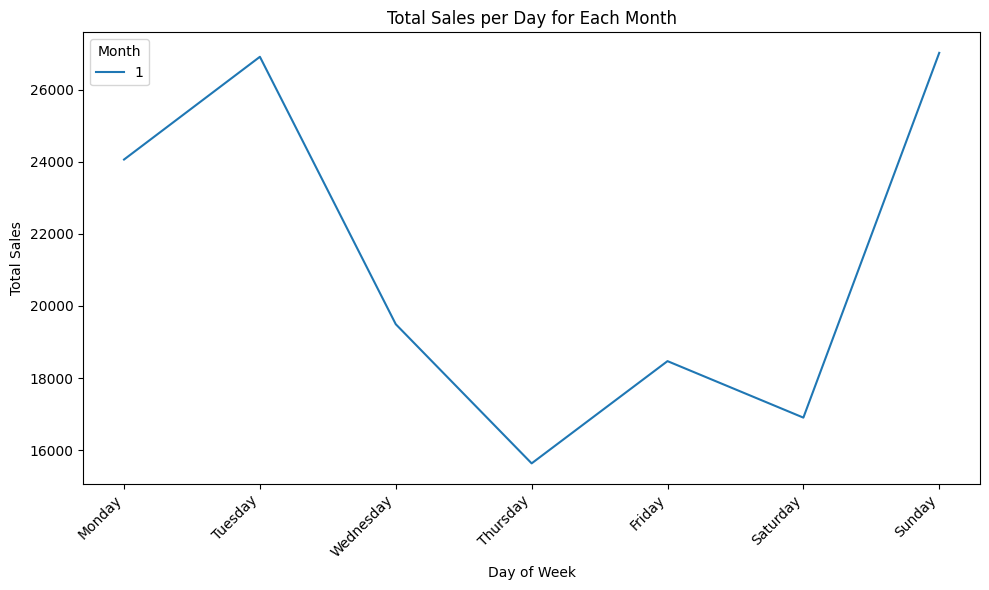

In [12]:
transaction_table = df.groupby(['month', 'day_name'])['NO_BKT'].count().reset_index()
transaction_table = transaction_table.pivot(index='month', columns='day_name', values='NO_BKT').fillna(0)
days_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
transaction_table = transaction_table[days_order]
transaction_table = transaction_table.astype(int)
transaction_table = transaction_table.T
transaction_table.plot(kind='line', figsize=(10, 6))
plt.title('Total Sales per Day for Each Month')
plt.xlabel('Day of Week')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Month')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


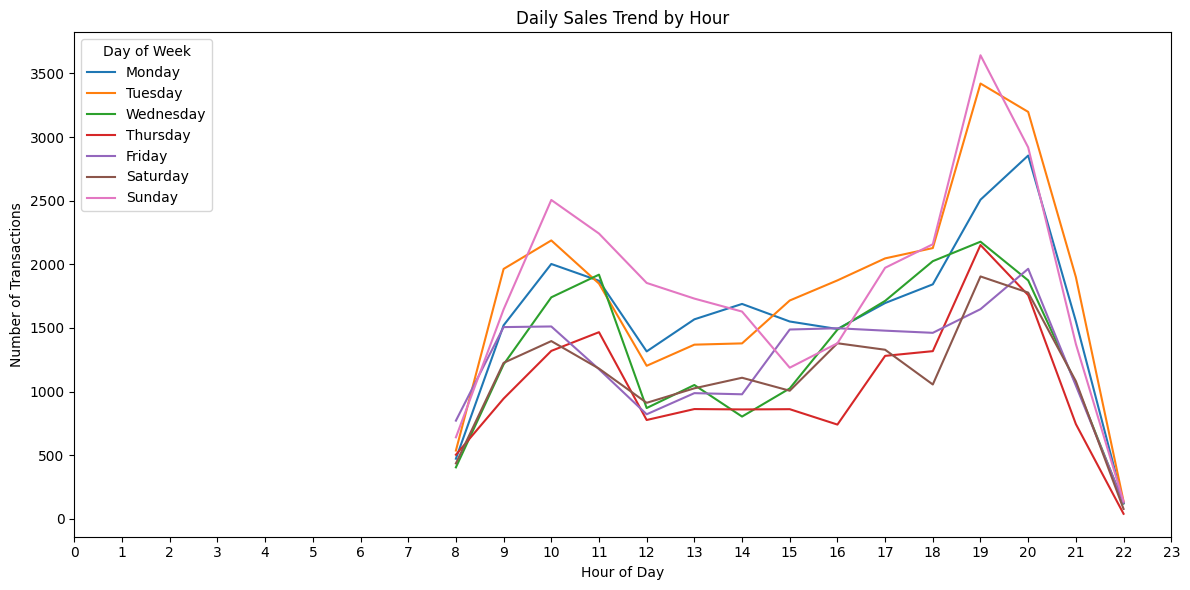

In [13]:
daily_hourly_sales = df.groupby(['day_name', 'hour'])['NO_BKT'].count().reset_index()
daily_hourly_sales = daily_hourly_sales.pivot(index='hour', columns='day_name', values='NO_BKT').fillna(0)
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_hourly_sales = daily_hourly_sales[days_order]
daily_hourly_sales.plot(kind='line', figsize=(12, 6))
plt.title('Daily Sales Trend by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.xticks(range(24))  # Set x-axis ticks for each hour
plt.legend(title='Day of Week')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


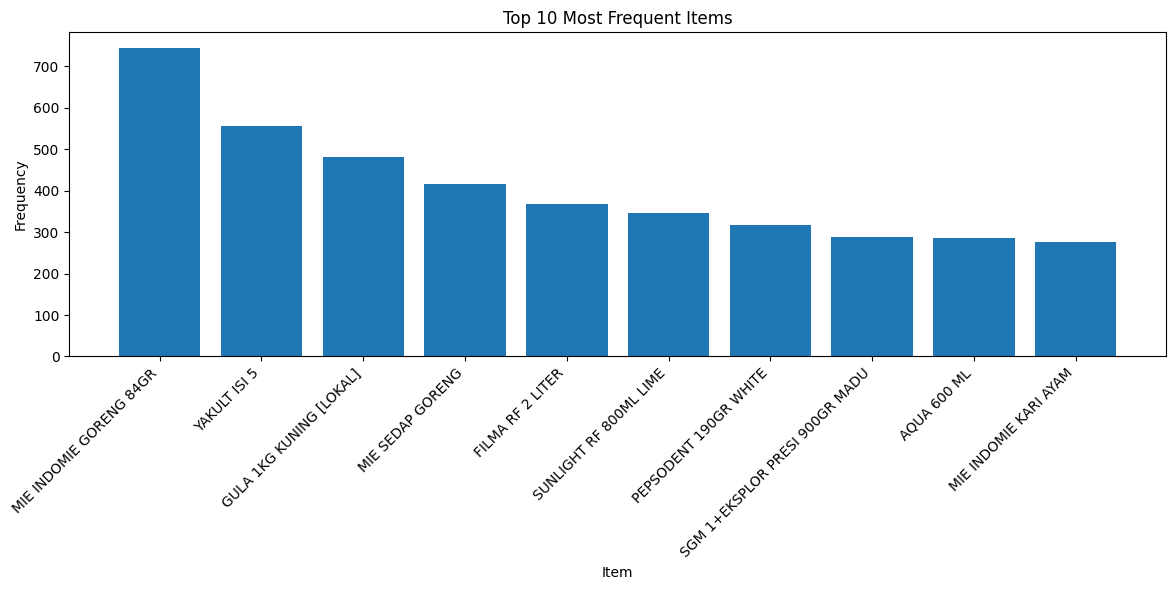

In [14]:
item_frequency = df.groupby('NAMA')['NO_BKT'].count().reset_index()

# Rename the 'Transaction' column to 'Frequency'
item_frequency = item_frequency.rename(columns={'NO_BKT': 'Frequency'})

# Sort by frequency in descending order
item_frequency = item_frequency.sort_values(by=['Frequency'], ascending=False)

# Create a bar plot for the top 10 items
plt.figure(figsize=(12, 6))
plt.bar(item_frequency['NAMA'].head(10), item_frequency['Frequency'].head(10))
plt.xlabel('Item')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Items')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [15]:
apriori_data = pd.crosstab(df['NO_BKT'], df['KEL'])
apriori_data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KEL,A BABY,A JAHIT,A TULIS,A.AGAR,A.DAPUR,ABON,ACNES,AGENDA,AIR.M,AKANTOR,...,VIVA,WAFER,WAFER.P,WAFERKL,WALLS,WARDAH,WONDERL,WRP,WRP LW,ZWITSAL
NO_BKT,,,,,,,,,,,,,,,,,,,,,
0001/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0002/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0003/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0004/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0005/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
basket_encoded = apriori_data.applymap(lambda x: 1 if x > 0 else 0)
basket_encoded.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-16-18aaf985f75e>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_encoded = apriori_data.applymap(lambda x: 1 if x > 0 else 0)


KEL,A BABY,A JAHIT,A TULIS,A.AGAR,A.DAPUR,ABON,ACNES,AGENDA,AIR.M,AKANTOR,...,VIVA,WAFER,WAFER.P,WAFERKL,WALLS,WARDAH,WONDERL,WRP,WRP LW,ZWITSAL
NO_BKT,,,,,,,,,,,,,,,,,,,,,
0001/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0002/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0003/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0004/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0005/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
frequent_itemsets = apriori(basket_encoded, min_support=0.02, use_colnames=True)
result= frequent_itemsets[['support', 'itemsets']]
print("Frequent Itemsets:")
result

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Frequent Itemsets:


,support,itemsets
0,0.037991,(AIR.M)
1,0.032251,(ASESORS)
2,0.033590,(B DAPUR)
3,0.063600,(BISCPAK)
4,0.024106,(BTL/DOT)
5,0.032360,(COKLAT)
6,0.026593,(DDORANT)
7,0.083607,(DETERJN)
8,0.028507,(GULA)
9,0.021373,(HBL)


In [18]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
print("\nAssociation Rules:")
rules


Association Rules:


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(BISCPAK),(SNACK),0.063600,0.068984,0.021974,0.345509,5.008515,0.017587,1.422504,0.854699
1,(SNACK),(BISCPAK),0.068984,0.063600,0.021974,0.318542,5.008515,0.017587,1.374112,0.859642
2,(MIE),(DETERJN),0.078878,0.083607,0.023259,0.294872,3.526894,0.016664,1.299612,0.777817
3,(DETERJN),(MIE),0.083607,0.078878,0.023259,0.278195,3.526894,0.016664,1.276137,0.781831
4,(SOFTENR),(DETERJN),0.042883,0.083607,0.027605,0.643722,7.699413,0.024019,2.572131,0.909105
5,(DETERJN),(SOFTENR),0.083607,0.042883,0.027605,0.330173,7.699413,0.024019,1.428902,0.949505
6,(SUSU KT),(DETERJN),0.166530,0.083607,0.023997,0.144100,1.723545,0.010074,1.070678,0.503678
7,(DETERJN),(SUSU KT),0.083607,0.166530,0.023997,0.287022,1.723545,0.010074,1.168998,0.458101
8,(P GIGI),(PAMPERS),0.076227,0.139718,0.020608,0.270348,1.934954,0.009958,1.179030,0.523064
9,(PAMPERS),(P GIGI),0.139718,0.076227,0.020608,0.147496,1.934954,0.009958,1.083600,0.561667


Seasonal Insights:

Di dalam penjualan supermarket ini pada bulan Januari menunjukkan rata-rata di setiap hari minggu hingga selasa memiliki jumlah transaksi atau penjualan yang tinggi. Pembelian meningkat pada jam 9 hingga 11 pagi dan kemudian akan kembali turun dan meningkat kembali pada pukul 19.00 hingga 21.00. Dan grafik menampilkan 10 barang teratas yang paling sering dibeli di supermarket adalah "Mie Indomie Goreng 84gr" memimpin sebagai produk terlaris, mencerminkan popularitasnya sebagai pilihan makanan yang nyaman dan terjangkau. "Yakult (Isi 5)" mengikuti, menunjukkan permintaan yang kuat untuk minuman yang berfokus pada kesehatan. Bahan pokok rumah tangga penting seperti "Gula 1kg Kuning (Lokal)" (gula) dan produk yang berhubungan dengan memasak seperti "Filma RF 2 Liter" (minyak goreng) dan "Sunlight RF 800ml Lime" (cairan pencuci piring) juga menempati peringkat tinggi, menunjukkan pengisian ulang rumah tangga secara rutin. Selain itu, barang-barang kebersihan seperti "Pepsodent 190gr White" (pasta gigi) dan "SGM 1+ Eksplor Presi 900gr Madu" (susu bubuk) menunjukkan permintaan yang konsisten. Dimasukkannya "Aqua 600ml" menyoroti pentingnya air kemasan, sementara "Mie Indomie Kari Ayam" mewakili preferensi lebih lanjut untuk mie instan. Data ini menegaskan keseimbangan antara makanan, minuman, dan barang-barang rumah tangga penting, menggarisbawahi peluang untuk mengoptimalkan pengaturan lorong untuk kenyamanan dan potensi penjualan silang.
Di bulan Januari, tidak ada anomali musiman yang signifikan yang disorot dari data yang diberikan; Namun, awal tahun sering kali sejalan dengan periode restocking rutin untuk rumah tangga, terutama dalam produk kebersihan dan pembersih. Barang-barang seperti deterjen dan pelembut kain menunjukkan permintaan yang kuat, kemungkinan didorong oleh kebiasaan pembersihan pasca liburan. Demikian pula, produk perawatan pribadi seperti pasta gigi, sampo, dan sabun menyarankan perilaku pembelian yang konsisten yang selaras dengan kebutuhan rumah tangga yang penting. Makanan ringan dan minuman dapat mencerminkan tren konsumsi yang berkelanjutan dari periode liburan, menunjukkan relevansinya dalam memenuhi kenyamanan dan kebutuhan kesenangan.
Data transaksi mengungkapkan hubungan yang signifikan antara berbagai pasangan produk:
Deterjen dan Pelembut Kain: Skor asosiasi yang tinggi menunjukkan ini sering dibeli bersama, menunjukkan sifatnya yang saling melengkapi.
Sampo, Sabun, dan Pasta Gigi: Keterkaitan yang kuat di antara barang-barang ini menunjukkan bahwa mereka membentuk bundel pembelian yang berfokus pada kebersihan yang umum.
Makanan ringan dan Biskuit: Barang-barang ini menunjukkan pasangan yang konsisten, selaras dengan kebiasaan ngemil yang khas.
Produk yang berhubungan dengan Pampers dan Bayi: Meskipun tren spesifik tidak disorot untuk ini, tren tersebut kemungkinan melayani segmen pelanggan tertentu.
Potensi penjualan silang: Skor afinitas yang tinggi antara produk pelengkap menyoroti peluang untuk meningkatkan penjualan melalui penempatan produk strategis.
Kesimpulan: Wawasan yang dapat ditindaklanjuti ini dapat mengoptimalkan tata letak toko dengan mengelompokkan item pelengkap dan meningkatkan aksesibilitas. Pendekatan berbasis data ini kemungkinan akan meningkatkan pengalaman berbelanja, meningkatkan penjualan silang, dan meningkatkan kinerja penjualan secara keseluruhan pada bulan Januari.

